# <center>Data Acquition By API</center>


## Fetching Data From an API

- To accomplish the need for data most of the time, it is required to fetch data from API and if the website does not provide API, then the only option left is Web Scraping.

- Here, We are going to learn how ywe can use API, extract data and save it in the form of a data frame.

- Fetching Data from an API involves accessing and retrieving structured data from web services, offering a convenient way to obtain real-time or specific information.


## Introduction

- In this project, we are working with the The Movie Database (TMDb) API to fetch data on top-rated movies. The goal is to extract relevant information from the API, process it, and store it in a structured format for further analysis. By leveraging the TMDb API, we can access a vast database of movie details, including titles, release dates, popularity metrics, and user ratings.

- This project demonstrates how to interact with an external API, handle large datasets, manage potential network errors, and save the collected data in a format that is easy to analyze, such as a CSV file. Such skills are essential for data scientists, analysts, and developers who work with real-world data, which often requires integration with external data sources.


## Description

- The TMDb API provides access to a rich dataset of movies, TV shows, and actors. In this project, we focus specifically on retrieving data for the top-rated movies. The API returns data in JSON format, which is parsed and processed using Python's requests library to handle the HTTP requests and pandas to structure the data.

- The JSON response from the API contains a list of movies on each page, with each movie having multiple attributes such as its ID, title, overview, release date, popularity, vote average, and vote count. We are interested in these specific attributes, which we will extract and store in a Pandas DataFrame.

- Given that the API returns paginated data, where each page contains a subset of the total dataset, we need to loop through multiple pages to collect all the data. In this case, we are retrieving data from 478 pages, each containing up to 20 movies. The final dataset will be a comprehensive collection of top-rated movies, which can be analyzed or used for further projects, such as movie recommendation systems, trend analysis, or even machine learning models.

### The API on which we are working is:

https://api.themoviedb.org/3/movie/top_rated?api_key=YOUR_API_KEY&language=en-US&page=1

It will show all the data for page number 1


<br>


create a `.env` file and store the api key in it for keeping it safe from access by anyone else.

TMDB_API_KEY = `YOUR_API_KEY`

### Steps For Creating API_KEY on TMDb:

1. Go to this Website [themoviedb](https://www.themoviedb.org/)
2. Go to top right corner and click on your `profile icon`.
3. Select `settings` from the pop-up menus.
4. Under `settings` option choose `API` option.
5. Click on `Create API Key` and fill all the require informations.

When you hit the above URL with your API key, the TMDb server will fetch a JSON data which on the top level has the following format for each page.


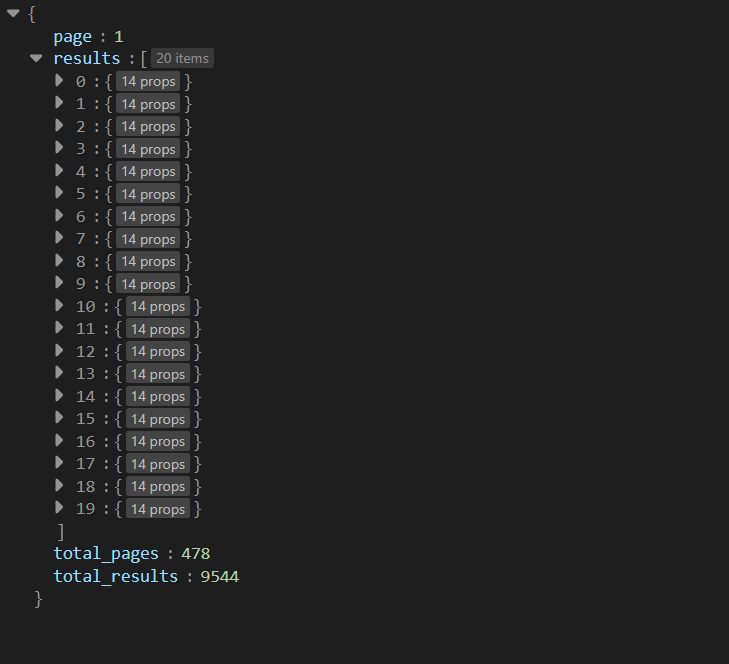


We will be working on the following data from the API to make a new dataframe.

- ID
- TITLE
- RELEASE DATE
- OVERVIEW
- POPULARITY
- VOTE_AVERAGE
- VOTE_COUNT


## Attributes in the Dataset

To create a new DataFrame from the API data, we will focus on extracting specific fields that are crucial for analyzing and understanding the top-rated movies. 

These fields are:

- `id`: This is a unique identifier for each movie. It helps in distinguishing one movie from another and can be used for referencing specific movies in subsequent operations.

- `title`: The title of the movie. This field provides the name of the movie, which is essential for identifying and understanding the content of the dataset.

- `release_date`: The date when the movie was released. This information is valuable for analyzing trends over time, understanding the distribution of movies across different years, and identifying the most recent top-rated movies.

- `overview`: A brief summary or description of the movie. This field provides context about the movie's plot and can be used for more in-depth content analysis, such as sentiment analysis or keyword extraction.

- `popularity`: A numeric value representing the movie's popularity. This field is important for understanding how well-received or widely recognized the movie is. Popularity can be influenced by various factors such as marketing, star power, and public reception.

- `vote_average`: The average rating given by users. This field is crucial for identifying the quality or critical reception of the movie. Higher vote averages typically indicate better-received movies.

- `vote_count`: The number of votes that contributed to the vote average. This field provides context to the vote average by indicating how many users rated the movie. A higher vote count can lend more credibility to the vote average.

So the shape of our resultant dataset will be:

9544 \* 7, Where 9544 is the total result of the top rated movies and 7 is the number of columns that we are choosing.


In [1]:
# Pandas for data manipulation and analysis
import pandas as pd

# Requests for sending HTTP requests to the API
import requests

# Time for managing retries with delay
import time

import os
from dotenv import load_dotenv

In [2]:
# Load environment variables from the .env file
load_dotenv()

True

In [3]:
# Retrieve the API key from environment variables
api_key = os.getenv('TMDB_API_KEY')

In [4]:
# Fetch the top-rated movies data from The Movie Database (TMDb) API for the first page
response = requests.get(f'https://api.themoviedb.org/3/movie/top_rated?api_key={api_key}&language=en-US&page=1', timeout=10)

In [5]:
# Check the response object to ensure that the request was successful (200 OK)
response

<Response [200]>

In [6]:
# Parse the JSON response to extract the 'results' which contains the list of movies
response.json()['results']

[{'adult': False,
  'backdrop_path': '/avedvodAZUcwqevBfm8p4G2NziQ.jpg',
  'genre_ids': [18, 80],
  'id': 278,
  'original_language': 'en',
  'original_title': 'The Shawshank Redemption',
  'overview': 'Imprisoned in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.',
  'popularity': 173.624,
  'poster_path': '/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg',
  'release_date': '1994-09-23',
  'title': 'The Shawshank Redemption',
  'video': False,
  'vote_average': 8.705,
  'vote_count': 26561},
 {'adult': False,
  'backdrop_path': '/tmU7GeKVybMWFButWEGl2M4GeiP.jpg',
  'genre_ids': [18, 80],
  'id': 238,
  'original_language': 'en',
  'original_title': 'The Godfather',
  'overvi

In [7]:
# Convert the list of movie data into a DataFrame and display the first few rows
pd.DataFrame(response.json()['results']).head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/avedvodAZUcwqevBfm8p4G2NziQ.jpg,"[18, 80]",278,en,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,173.624,/9cqNxx0GxF0bflZmeSMuL5tnGzr.jpg,1994-09-23,The Shawshank Redemption,False,8.705,26561
1,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,"[18, 80]",238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",300.830,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-14,The Godfather,False,8.691,20161
2,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,"[18, 80]",240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,101.450,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,1974-12-20,The Godfather Part II,False,8.575,12166
3,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,"[18, 36, 10752]",424,en,Schindler's List,The true story of how businessman Oskar Schind...,120.252,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,1993-12-15,Schindler's List,False,8.565,15570
4,False,/qqHQsStV6exghCM7zbObuYBiYxw.jpg,[18],389,en,12 Angry Men,The defense and the prosecution have rested an...,76.404,/ow3wq89wM8qd5X7hWKxiRfsFf9C.jpg,1957-04-10,12 Angry Men,False,8.500,8417


In [8]:
# Create a DataFrame with only the selected columns: id, title, overview, release_date, popularity, vote_average, vote_count
topMoviesDF = pd.DataFrame(response.json()['results'])[['id', 'title', 'overview', 'release_date', 'popularity', 'vote_average', 'vote_count']]

In [9]:
# Display the filtered DataFrame
topMoviesDF

,id,title,overview,release_date,popularity,vote_average,vote_count
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,173.624,8.705,26561
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,300.830,8.691,20161
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,101.450,8.575,12166
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,120.252,8.565,15570
4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,76.404,8.500,8417
5,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",2001-04-18,130.750,8.537,16176
6,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,53.153,8.536,4410
7,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,186.921,8.516,32311
8,496243,Parasite,"All unemployed, Ki-taek's family takes peculia...",2019-05-30,110.982,8.508,17837
9,497,The Green Mile,A supernatural tale set on death row in a Sout...,1999-12-10,113.410,8.505,17058


In [10]:
# Initialize an empty DataFrame to store all the pages of movie data
new_df = pd.DataFrame()


new_df

""


In [11]:
# Loop through pages 1 to 478 (seeing that there are 478 pages of top-rated movies in the API)
for i in range(1, 479):
    # Flag to track whether the request was successful
    success = False

    # Set the number of retries in case of a request failure
    retries = 5
    while not success and retries > 0:
        try:
            # Construct the API URL for the current page number
            # Request the top-rated movies from the API
            response = requests.get(
                f'https://api.themoviedb.org/3/movie/top_rated?api_key={api_key}&language=en-US&page={i}')

            # Check if the request was successful (status code 200)
            response.raise_for_status()

            # Extract the relevant data for the current page and store it in a temporary DataFrame
            temp_df = pd.DataFrame(response.json()['results'])[
                ['id', 'title', 'overview', 'release_date', 'popularity', 'vote_average', 'vote_count']]

            # Concatenate the temporary DataFrame with the main DataFrame
            new_df = pd.concat([new_df, temp_df], ignore_index=True)

            # Mark the request as successful
            success = True
        except requests.exceptions.RequestException as e:
            # Print an error message if the request fails and decrement the retries counter
            print(f"Request failed on page {i}: {
                  e}. Retrying ({retries} retries left)...")
            retries -= 1

            # Wait for 5 seconds before attempting to retry the request
            time.sleep(5)

    if not success:
        # Print a message if the data could not be retrieved after all retries
        print(f"Failed to retrieve data for page {i} after multiple retries.")

In [ ]:
# More straight-forward way of doing the same above task without using wait method:


# for i in range(1, 479):
#     response = requests.get(
#         f'https://api.themoviedb.org/3/movie/top_rated?api_key={api_key}&language=en-US&page={i}')
#     temp_df = pd.DataFrame(response.json()['results'])[
#         ['id', 'title', 'overview', 'release_date', 'popularity', 'vote_average', 'vote_count']]

#     new_df = pd.concat([new_df, temp_df], ignore_index=True)

In [12]:
# Save the final DataFrame containing all the pages of data to a CSV file
new_df.to_csv('TMDb_Top_Rated_Movies.csv', index=False)